In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest

In [2]:
data1 = pd.read_csv("CCTV23_VB_Yolov9_dxdy_AVG_inv.csv")
data1.head(5)

,Ids,dx_avg,dy_avg,dx_inv,dy_inv
0,3,0.509390,0.998400,1.963133,1.001603
1,10,10.624664,4.678862,0.094121,0.213727
2,11,0.142068,0.617442,7.038860,1.619587
3,12,3.402827,9.671998,0.293873,0.103391
4,14,4.071513,8.042689,0.245609,0.124337


Text(0.5, 1.0, 'CCTV23_VB')

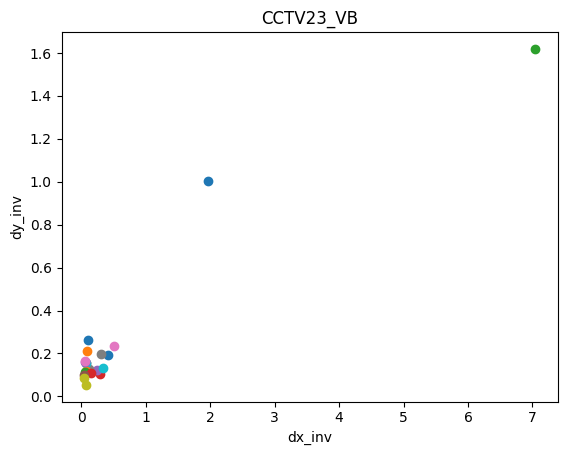

In [3]:
for id_num in data1["Ids"]:
    plot_value = data1[data1['Ids']==id_num]
    plt.scatter(plot_value['dx_inv'], plot_value['dy_inv'])
   
plt.xlabel("dx_inv")
plt.ylabel("dy_inv")
plt.title("CCTV23_VB")

c:\users\www\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of anomalies detected: 1
Anomaly Ids: 11


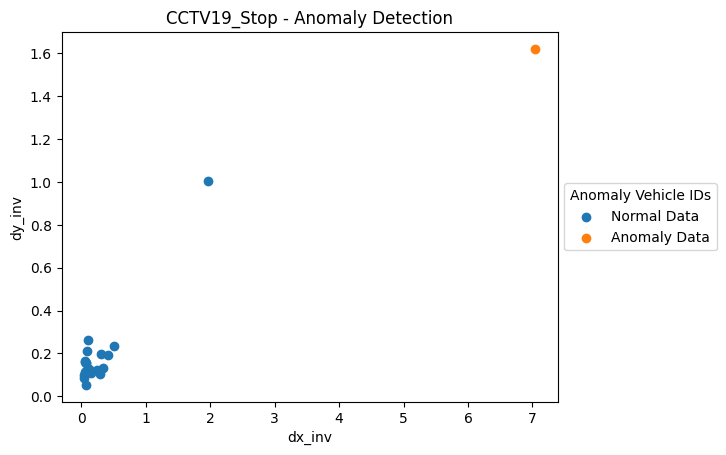

In [4]:
# Initialize Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.001)

# Fit the model and predict anomaly labels
anomaly_labels = model.fit_predict(data1[['dx_inv', 'dy_inv']])
data1["Anomaly"] = anomaly_labels

# Anomaly labels: 1 for normal data, -1 for anomalies
# 1 --> 0, -1 --> 1
data1["Anomaly"] = data1["Anomaly"].map({1: 0, -1: 1})

# Print the number of anomalies detected
num_anomalies = len(data1[data1["Anomaly"] == 1])
print(f"Number of anomalies detected: {num_anomalies}")

c1 = data1[data1['Anomaly'] == 0]
c2 = data1[data1['Anomaly'] == 1]

# Plot normal data
plt.scatter(c1['dx_inv'], c1['dy_inv'], label="Normal Data")

# Plot anomaly data
plt.scatter(c2['dx_inv'], c2['dy_inv'], label="Anomaly Data")

for id_num in c2["Ids"]:
    print(f'Anomaly Ids: {id_num}')

plt.xlabel("dx_inv")
plt.ylabel("dy_inv")
plt.title("CCTV19_Stop - Anomaly Detection")
plt.legend(title="Anomaly Vehicle IDs", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()